# Numerical Solution of Ordinary Differential Equations

TMA4125 Vår 2022

This notebook accompanies the slides [06a-Numerical-solution-of-ODEs.pdf](https://www.math.ntnu.no/emner/TMA4125/2022v/lecture-notes/06a-Numerical-solution-of-ODEs.pdf).

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import math

# Numerical algorithms
Let's implement simple routines to solve ODEs numerically, based on the three different methods seen in the first lecture

### Euler's method
The algorithm for Euler's method (Slide #7) looks like

In [2]:
# Define Euler's method
def Euler(y0, T, f, h):
    """
        Euler(y0, T, f, h)
    
    Use Euler's method to approximate the solution of the ODE (scalar or system) y'(t) = f(t,y)
    
    Input:
        y0 - initial value y(0)
        f  - definition of the right-hand-side function
        T  - simulation time (starting at t=0, ending at t=T)
        h  - time-step size (fixed)
    Output:
        y  - array containing all discrete solution values y0,y1,y2,...
        t  - array containing all discrete time instants 0,h,2h,...
    """
    ys = [y0] #array where all y_n will be stored
    ts = [0]  #array where all t_n will be stored
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        ys.append(y + h*f(t, y))
        ts.append(t + h)
    return (np.array(ts), np.array(ys))

# Heun's method
The algorithm for Heun's method (Slide #10) looks like

In [3]:
# Define Heun's method
def Heun(y0, T, f, h):
    """
        Heun(y0, T, f, h)
    
    Use Heun's method to approximate the solution of the ODE (scalar or system) y'(t) = f(t,y)
    
    Input:
        y0 - initial value y(0)
        f  - definition of the right-hand-side function
        T  - simulation time (starting at t=0, ending at t=T)
        h  - time-step size (fixed)
    Output:
        y  - array containing all discrete solution values y0,y1,y2,...
        t  - array containing all discrete time instants 0,h,2h,...
    """
    ys = [y0] #array where all y_n will be stored
    ts = [0]  #array where all t_n will be stored
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        f1 = f(t,y)
        f2 = f(t+h, y+h*f1)
        ys.append(y + 0.5*h*(f1+f2))
        ts.append(t + h)
    return (np.array(ts), np.array(ys))

### Second-order Taylor method
The second-order Taylor method (Slide #14) requires an additional input: the total time derivative $\frac{\mathrm{d}f}{\mathrm{d}t}$ of the right-hand-side function $f(t,y(t))$. For a scalar ODE, the algorithm looks like this:

In [4]:
# Define the second-order Taylor method
def scalarTaylor2(y0, T, f, DfDt, h):
    """
        scalarTaylor2(y0, T, f, h)
    
    Use the second-order Taylor method to approximate the solution of the scalar ODE y'(t) = f(t,y)
    
    Input:
        y0   - initial value y(0)
        f    - definition of the right-hand-side function
        DfDt - definition of the total time derivative of f
        T    - simulation time (starting at t=0, ending at t=T)
        h    - time-step size (fixed)
    Output:
        y  - vector containing all discrete solution values y0,y1,y2,...
        t  - vector containing all discrete time instants 0,h,2h,...
    """
    ys = [y0] #array where all y_n will be stored
    ts = [0]  #array where all t_n will be stored
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        ys.append(y + h*f(t,y) + 0.5*h*h*DfDt(t,y))
        ts.append(t + h)
    return (np.array(ts), np.array(ys))

# Numerical examples

## The simple pendulum 

Let's use Euler's and Heun's methods to solve the pendulum problem from sldes 2 - 3:

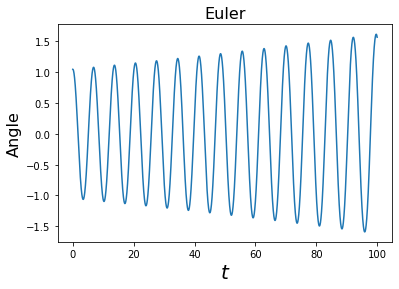

In [5]:
#Input parameters
g = 9.81 #gravity [m/s^2]
L = 10 #string length [m]
T = 100 #simulation time [s]
y0 = np.array([pi/3, 0]) #initital condition [rad,rad/s]
h = 0.01 #time-step size [s]

# Define the (vector-valued) right-hand-side function
def f(t, y):
    f = np.array([y[1], -(g/L)*np.sin(y[0])]) 
    return f

#Solution via Euler's method
ts, ys = Euler(y0, T, f, h)

# Plot results
plt.plot(ts, ys[:,0])
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('Angle', fontsize = 16)
plt.title('Euler', fontsize = 16)
plt.rcParams['figure.figsize'] = [14, 4]

Text(0.5, 1.0, 'Heun')

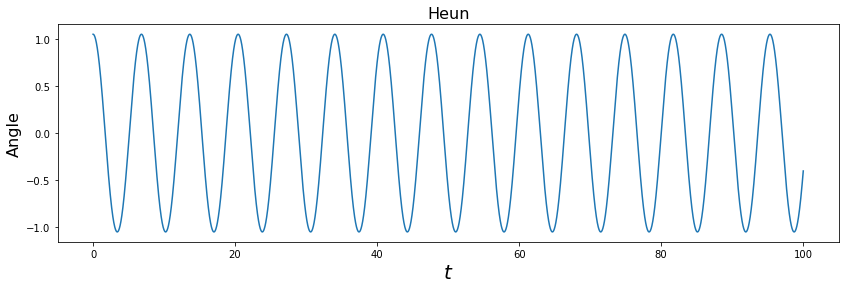

In [6]:
#Solution via Heun's method
ts, ys = Heun(y0, T, f, h)

# Plot results
plt.plot(ts, ys[:,0])
plt.ylabel('Angle', fontsize = 16)
plt.xlabel('$t$', fontsize = 20)
plt.title('Heun', fontsize = 16)

## Sphere in free fall: the Riccati equation
To test the accuracy of our algorithms, let's solve, numerically, the problem of a sphere in free fall, subject to an aerodynamic drag force. As we've seen in class (Slide #17), this problem can be modelled by the so-called Riccati equation:
\begin{align*}
\frac{\mathrm{dv}}{\mathrm{d} t} = g - \alpha \mathrm{v}^2, \quad \mathrm{v(0)} = \mathrm{v}_0\, .
\end{align*}
This problem has a known exact solution: 
\begin{align*}
\mathrm{v}(t) = \sqrt{\frac{g}{\alpha}}\tanh\left[\sqrt{\alpha g}t + \mathrm{atanh}\left(\mathrm{v}_0\sqrt{\alpha/g}\right)\right]
\end{align*}
We can use this to compute the accuracy of our numerical schemes:

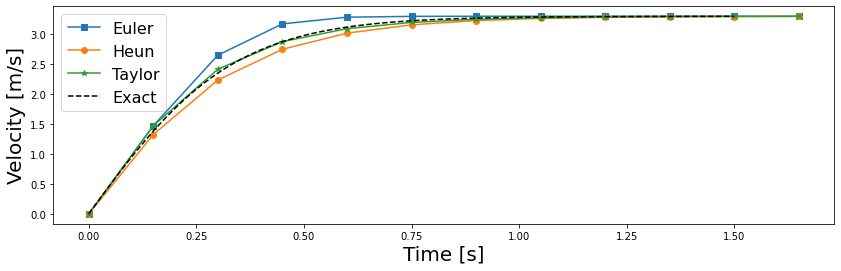

In [7]:
# Problem data
v0 = 0 #initial velocity, in m/s
rho = 1.22; #air density, in kg/m^3
k = .235; #empirical aerodynamic coefficient 
R = 1; #radius of the sphere, in meters
m = 1; #mass of the sphere, in kg
g = 9.81; #gravity, in m/s^2
alpha = k*rho*pi*R**2/m; #resulting Riccati coefficient (ODE: v' + alpha*v^2 - g = 0)

# Solver settings
T = 1.5 #Final simulation time, in seconds
h = 0.15 #Time-step size, in seconds

# Define right-hand-side function
def f(t,v):
    return  g - alpha*v**2

# Compute the total derivative DfDt based on the right-hand-side function f and its partial derivatives
# (this is needed for second-order Taylor)
def DfDt(t,v):
    f = g - alpha*v**2
    ft = 0
    fv = -2*alpha*v
    return  ft + f*fv
    
# Numerical solution via different methods
tEuler, vEuler = Euler(v0, T, f, h) 
tHeun, vHeun = Heun(v0, T, f, h)
tTaylor2, vTaylor2 = scalarTaylor2(v0, T, f, DfDt, h)

#Plot numerical solutions
plt.plot(tEuler, vEuler, 's-')
plt.plot(tHeun, vHeun, 'o-')
plt.plot(tTaylor2, vTaylor2, '*-')

# Define the inverse hyperbolic arc-tangent function, to evaluate the exact (analytical) solution
def atanh(x):
    return  .5*np.log(np.abs((1+x)/(1-x)))

#Plot exact solution 
t = np.linspace(0,T,1000);
plt.plot(t,((g/alpha)**.5)*np.tanh(((alpha*g)**.5)*t + atanh(v0*(alpha/g)**.5)),'--k')

#Axis and legend for the plots
plt.legend(['Euler', 'Heun', 'Taylor', 'Exact'], fontsize = 16)
plt.xlabel('Time [s]', fontsize = 20)
plt.ylabel('Velocity [m/s]', fontsize = 20)
plt.rcParams['figure.figsize'] = [15, 6]

#Compute and print global errors 
vExact = ((g/alpha)**.5)*np.tanh(((alpha*g)**.5)*tEuler + atanh(v0*(alpha/g)**.5))
errorEuler = max(abs(vExact-vEuler))
errorHeun = max(abs(vExact-vHeun))
errorTaylor2 = max(abs(vExact-vTaylor2))
#print('Euler error =', errorEuler)
#print('Heun error =',errorHeun)
#print('Taylor error =',errorTaylor2)


## When the Lipschitz condition is violated
With this last example, we will illustrate the fact that the Lipschitz condition is indeed necessary for the convergence of one-step methods. Let's consider the problem 
\begin{align*}
y'(t) =  2\sqrt{y(t)}, \quad y(0) = 0.
\end{align*}
This problem also has an analytical solution: 
\begin{align*}
y(t) = t^2\, .
\end{align*}
Nonetheless, the derivative of the right-hand-side function $f(y) = 2\sqrt{y}$ tends to infinity when $y=0$, so that no Lipschitz condition is fulfilled around that point. How does that impact our numerical methods? Let's see in practice:

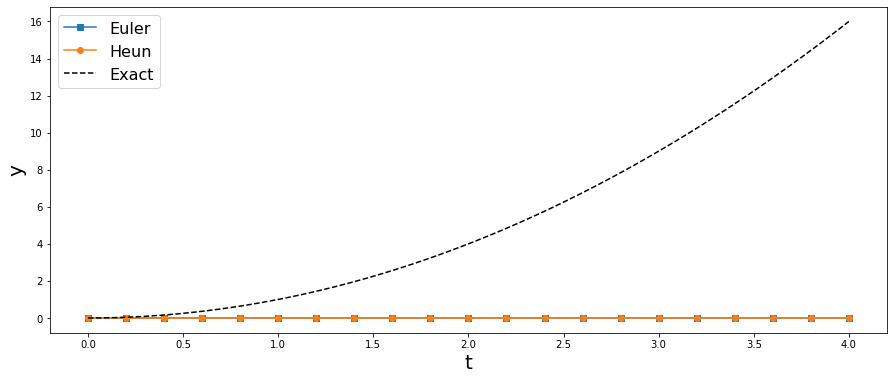

In [8]:
# Problem and solver settings
y0 = 0 #initial condition
T = 4 #Final simulation time
h = 0.2 #Time-step size

# Define right-hand-side function
def f(t,y):
    return   2*(y**.5)

# Numerical solution via different methods
tEuler, yEuler = Euler(y0, T, f, h) 
tHeun, yHeun = Heun(y0, T, f, h)

#Plot numerical solutions
plt.plot(tEuler, yEuler, 's-')
plt.plot(tHeun, yHeun, 'o-')

#Plot exact solution 
t = np.linspace(0,T,1000);
plt.plot(t,(t-y0**.5)**2,'--k')

#Axis and legend for the plots
plt.legend(['Euler', 'Heun', 'Exact'], fontsize = 16)
plt.xlabel('t', fontsize = 20)
plt.ylabel('y', fontsize = 20)

#Compute and print global errors 
yExact = (tEuler-y0**.5)**2
errorEuler = max(abs(yExact-yEuler))
errorHeun = max(abs(yExact-yHeun))
plt.rcParams['figure.figsize'] = [10, 5]